In [1]:
from ariel_experiments.utils.initialize import (
    generate_random_population_parallel,
)

from ariel_experiments.characterize.individual import (
    analyze_json_hash,
    analyze_mass,
    analyze_module_counts,
    analyze_json_hash_no_id,
)

from ariel_experiments.characterize.population import (
    # AnalyzedPopulation,
    get_full_analyzed_population,
    derive_numeric_summary,
    derive_uniques,
    derive_min_first_idx,
    derive_max_first_idx,
)

from ariel_experiments.gui_vis.visualize_data import (
    create_boxplot_from_raw,
    create_histogram_from_raw,
)

from ariel_experiments.gui_vis.gui import (
    IndividualVisualizer
)

from ariel_experiments.gui_vis.view_mujoco import view

from ariel_experiments.gui_vis.gui_simple import (
    SimpleNavigator
)


objc[45887]: Class GLFWHelper is implemented in both /Users/salomepoulain/projects/ariel-zoo/.venv/lib/python3.12/site-packages/open3d/cpu/pybind.cpython-312-darwin.so (0x175cefa28) and /Users/salomepoulain/projects/ariel-zoo/.venv/lib/python3.12/site-packages/glfw/libglfw.3.dylib (0x164badbb8). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[45887]: Class GLFWApplicationDelegate is implemented in both /Users/salomepoulain/projects/ariel-zoo/.venv/lib/python3.12/site-packages/open3d/cpu/pybind.cpython-312-darwin.so (0x175cefa78) and /Users/salomepoulain/projects/ariel-zoo/.venv/lib/python3.12/site-packages/glfw/libglfw.3.dylib (0x164badc08). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[45887]: Class GLFWWindowDelegate is implemented in both /Users/salomepoulain/projects/ariel-zoo/.venv/lib/python3.12/site-packages/open3d/cpu/pybind.cpython-3

Initialize population

In [2]:
population_size = 1_000
population = generate_random_population_parallel(population_size)

Output()

Choose global analyzers (these will be applied to all individuals)

In [3]:
individual_analyzers = [
    analyze_module_counts,
    analyze_mass,
    analyze_json_hash,
    analyze_json_hash_no_id,
]

derivation_analyzers = [
    derive_numeric_summary,
    derive_uniques,
    derive_min_first_idx,
    derive_max_first_idx,
]

analyzed_population = get_full_analyzed_population(
    population, individual_analyzers, derivation_analyzers
)

Output()

Output()

In [4]:
analyzed_population.show_tree()

AnalyzedPopulation — props=9 derived_keys=9
├── raw
│   ├── brick: len=1000, type=numeric
│   ├── core: len=1000, type=numeric
│   ├── edges: len=1000, type=numeric
│   ├── hash: len=1000, type=str
│   ├── hash_no_id: len=1000, type=str
│   ├── hinge: len=1000, type=numeric
│   ├── mass: len=1000, type=numeric
│   ├── none: len=1000, type=numeric
│   └── not-none: len=1000, type=numeric
└── derived
    ├── brick
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   ├── numeric_stats
    │   └── uniques
    ├── core
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   ├── numeric_stats
    │   └── uniques
    ├── edges
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   ├── numeric_stats
    │   └── uniques
    ├── hash
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   └── uniques
    ├── hash_no_id
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   └── uniques
    ├── hinge
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   ├── numeric_stats
    │   └── uniques
    ├── mass
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   ├── numeric_stats
    │   └── uniques
    ├── none
    │   ├── max_first_idx
    │   ├── min_first_idx
    │   ├── numeric_stats
    │   └── uniques
    └── not-none
        ├── max_first_idx
        ├── min_first_idx
        ├── numeric_stats
        └── uniques

Plot data of choice

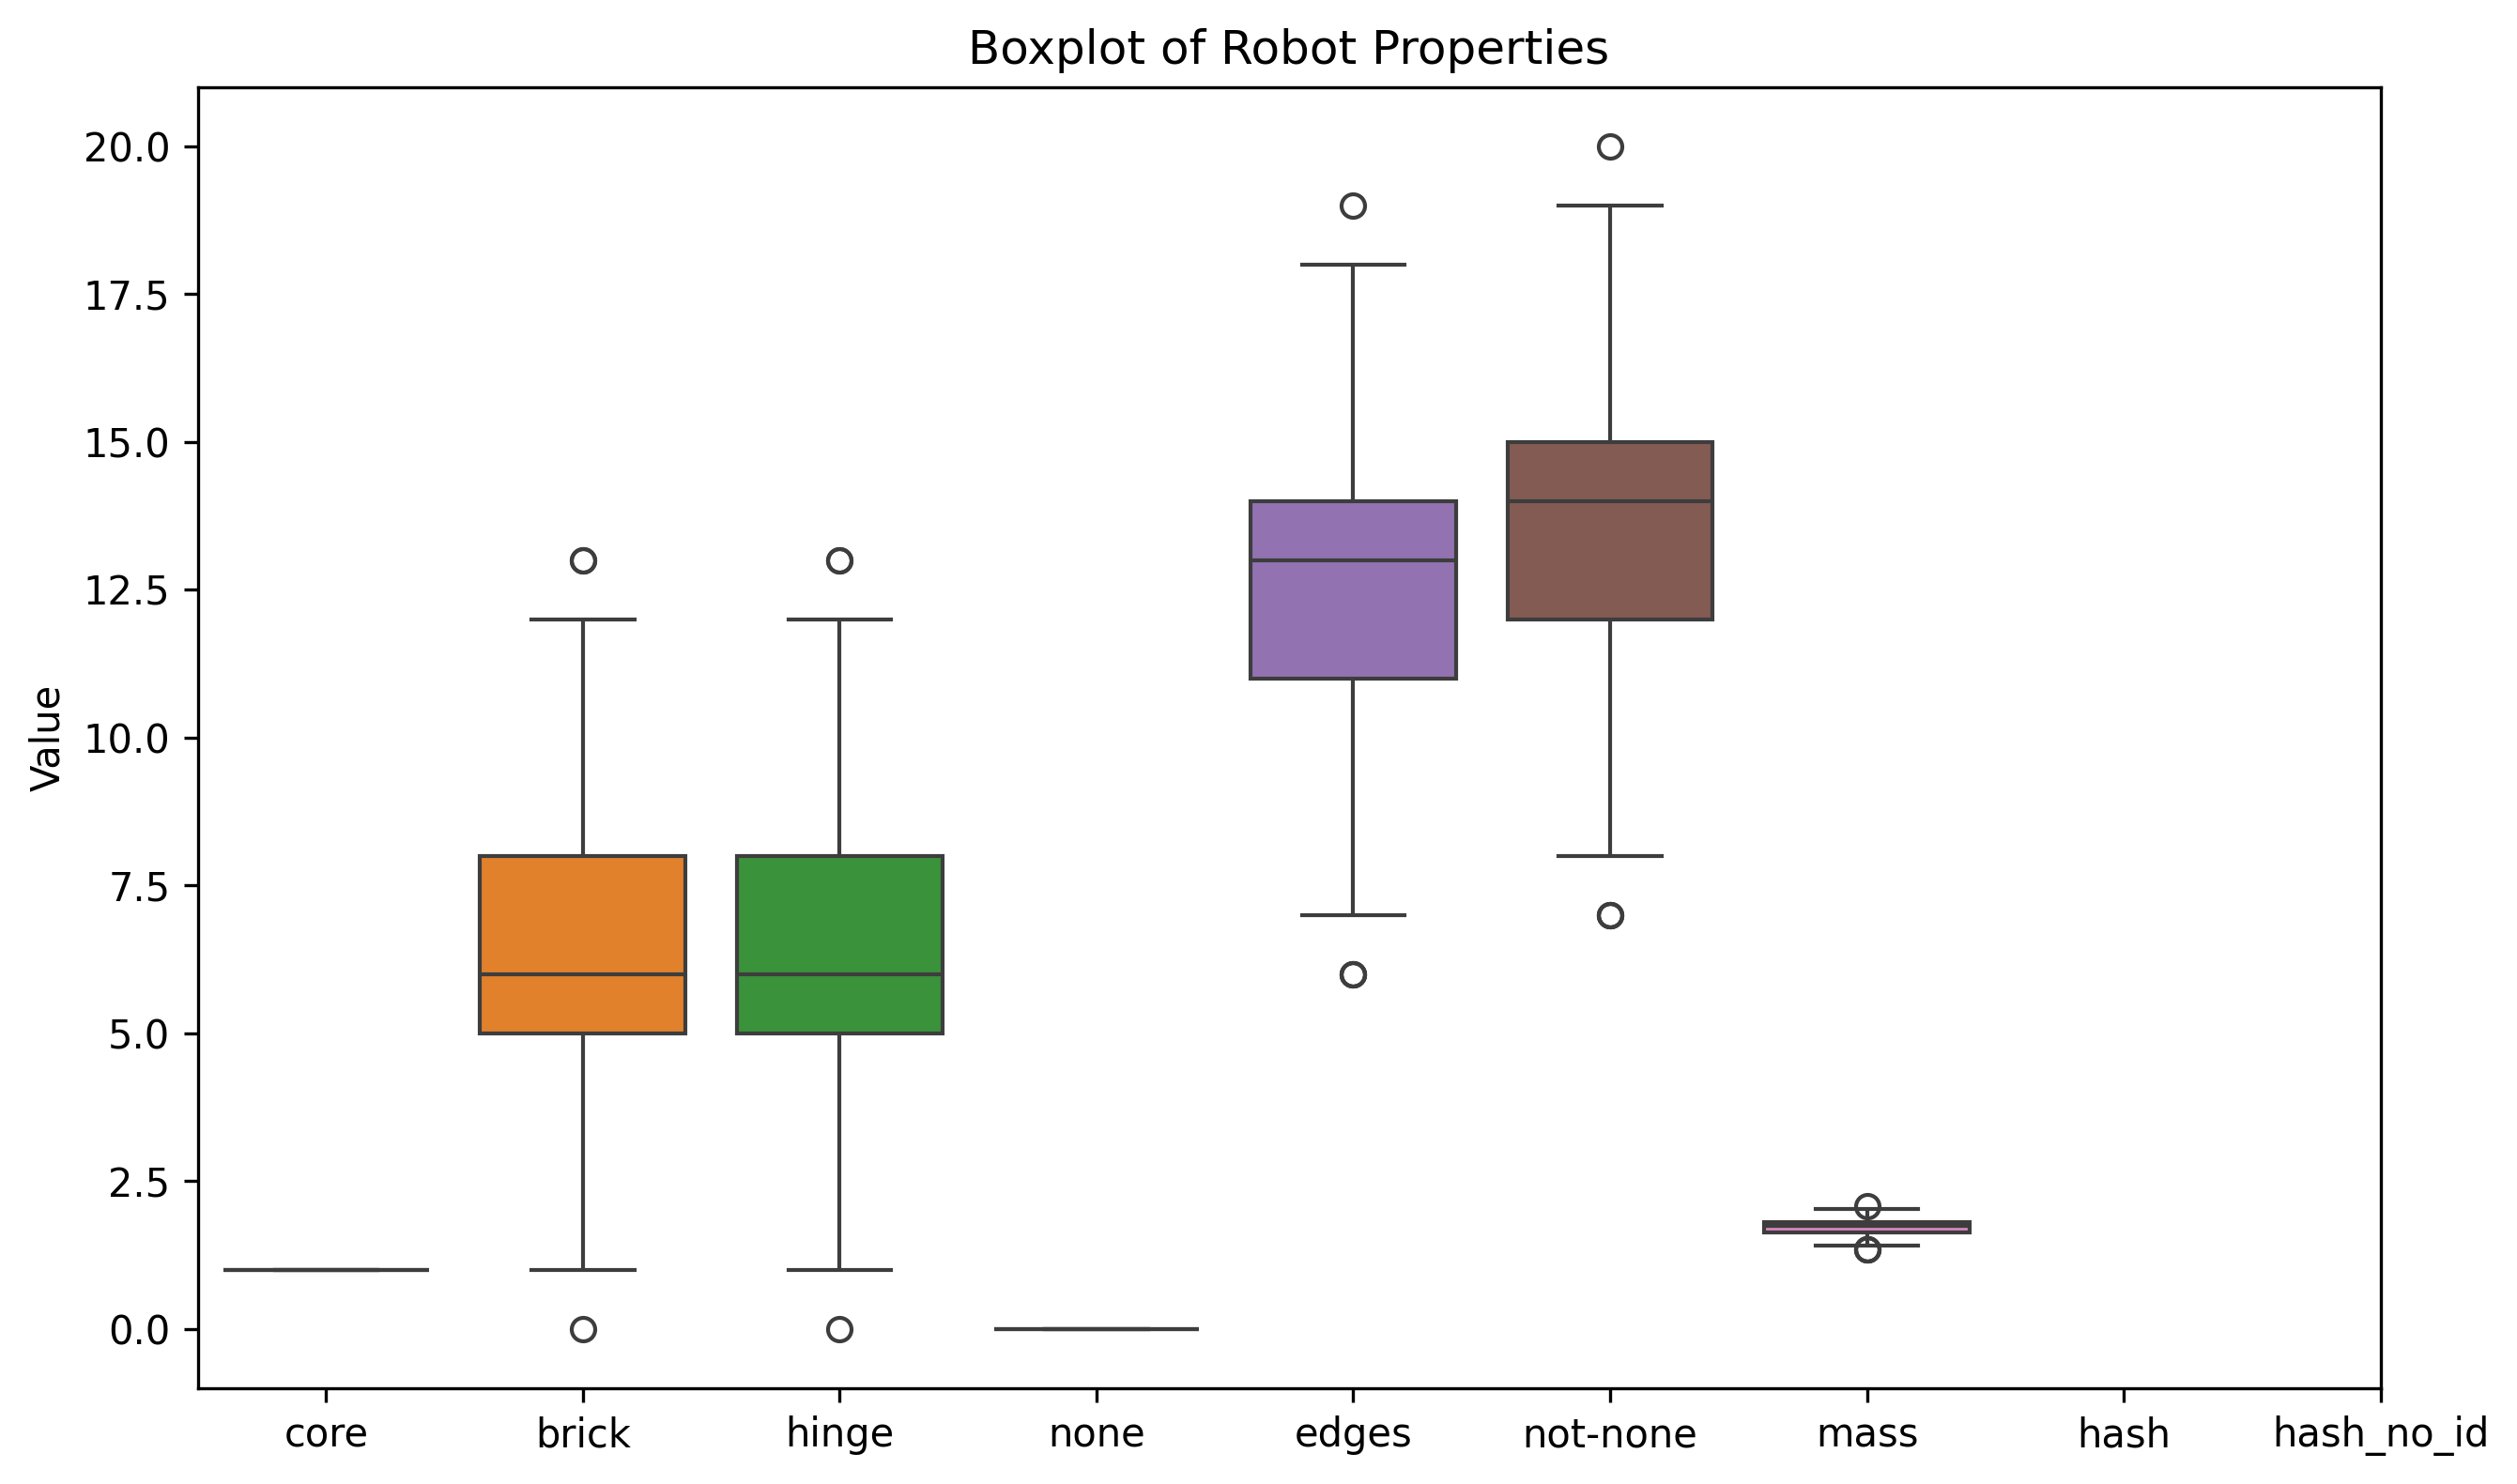

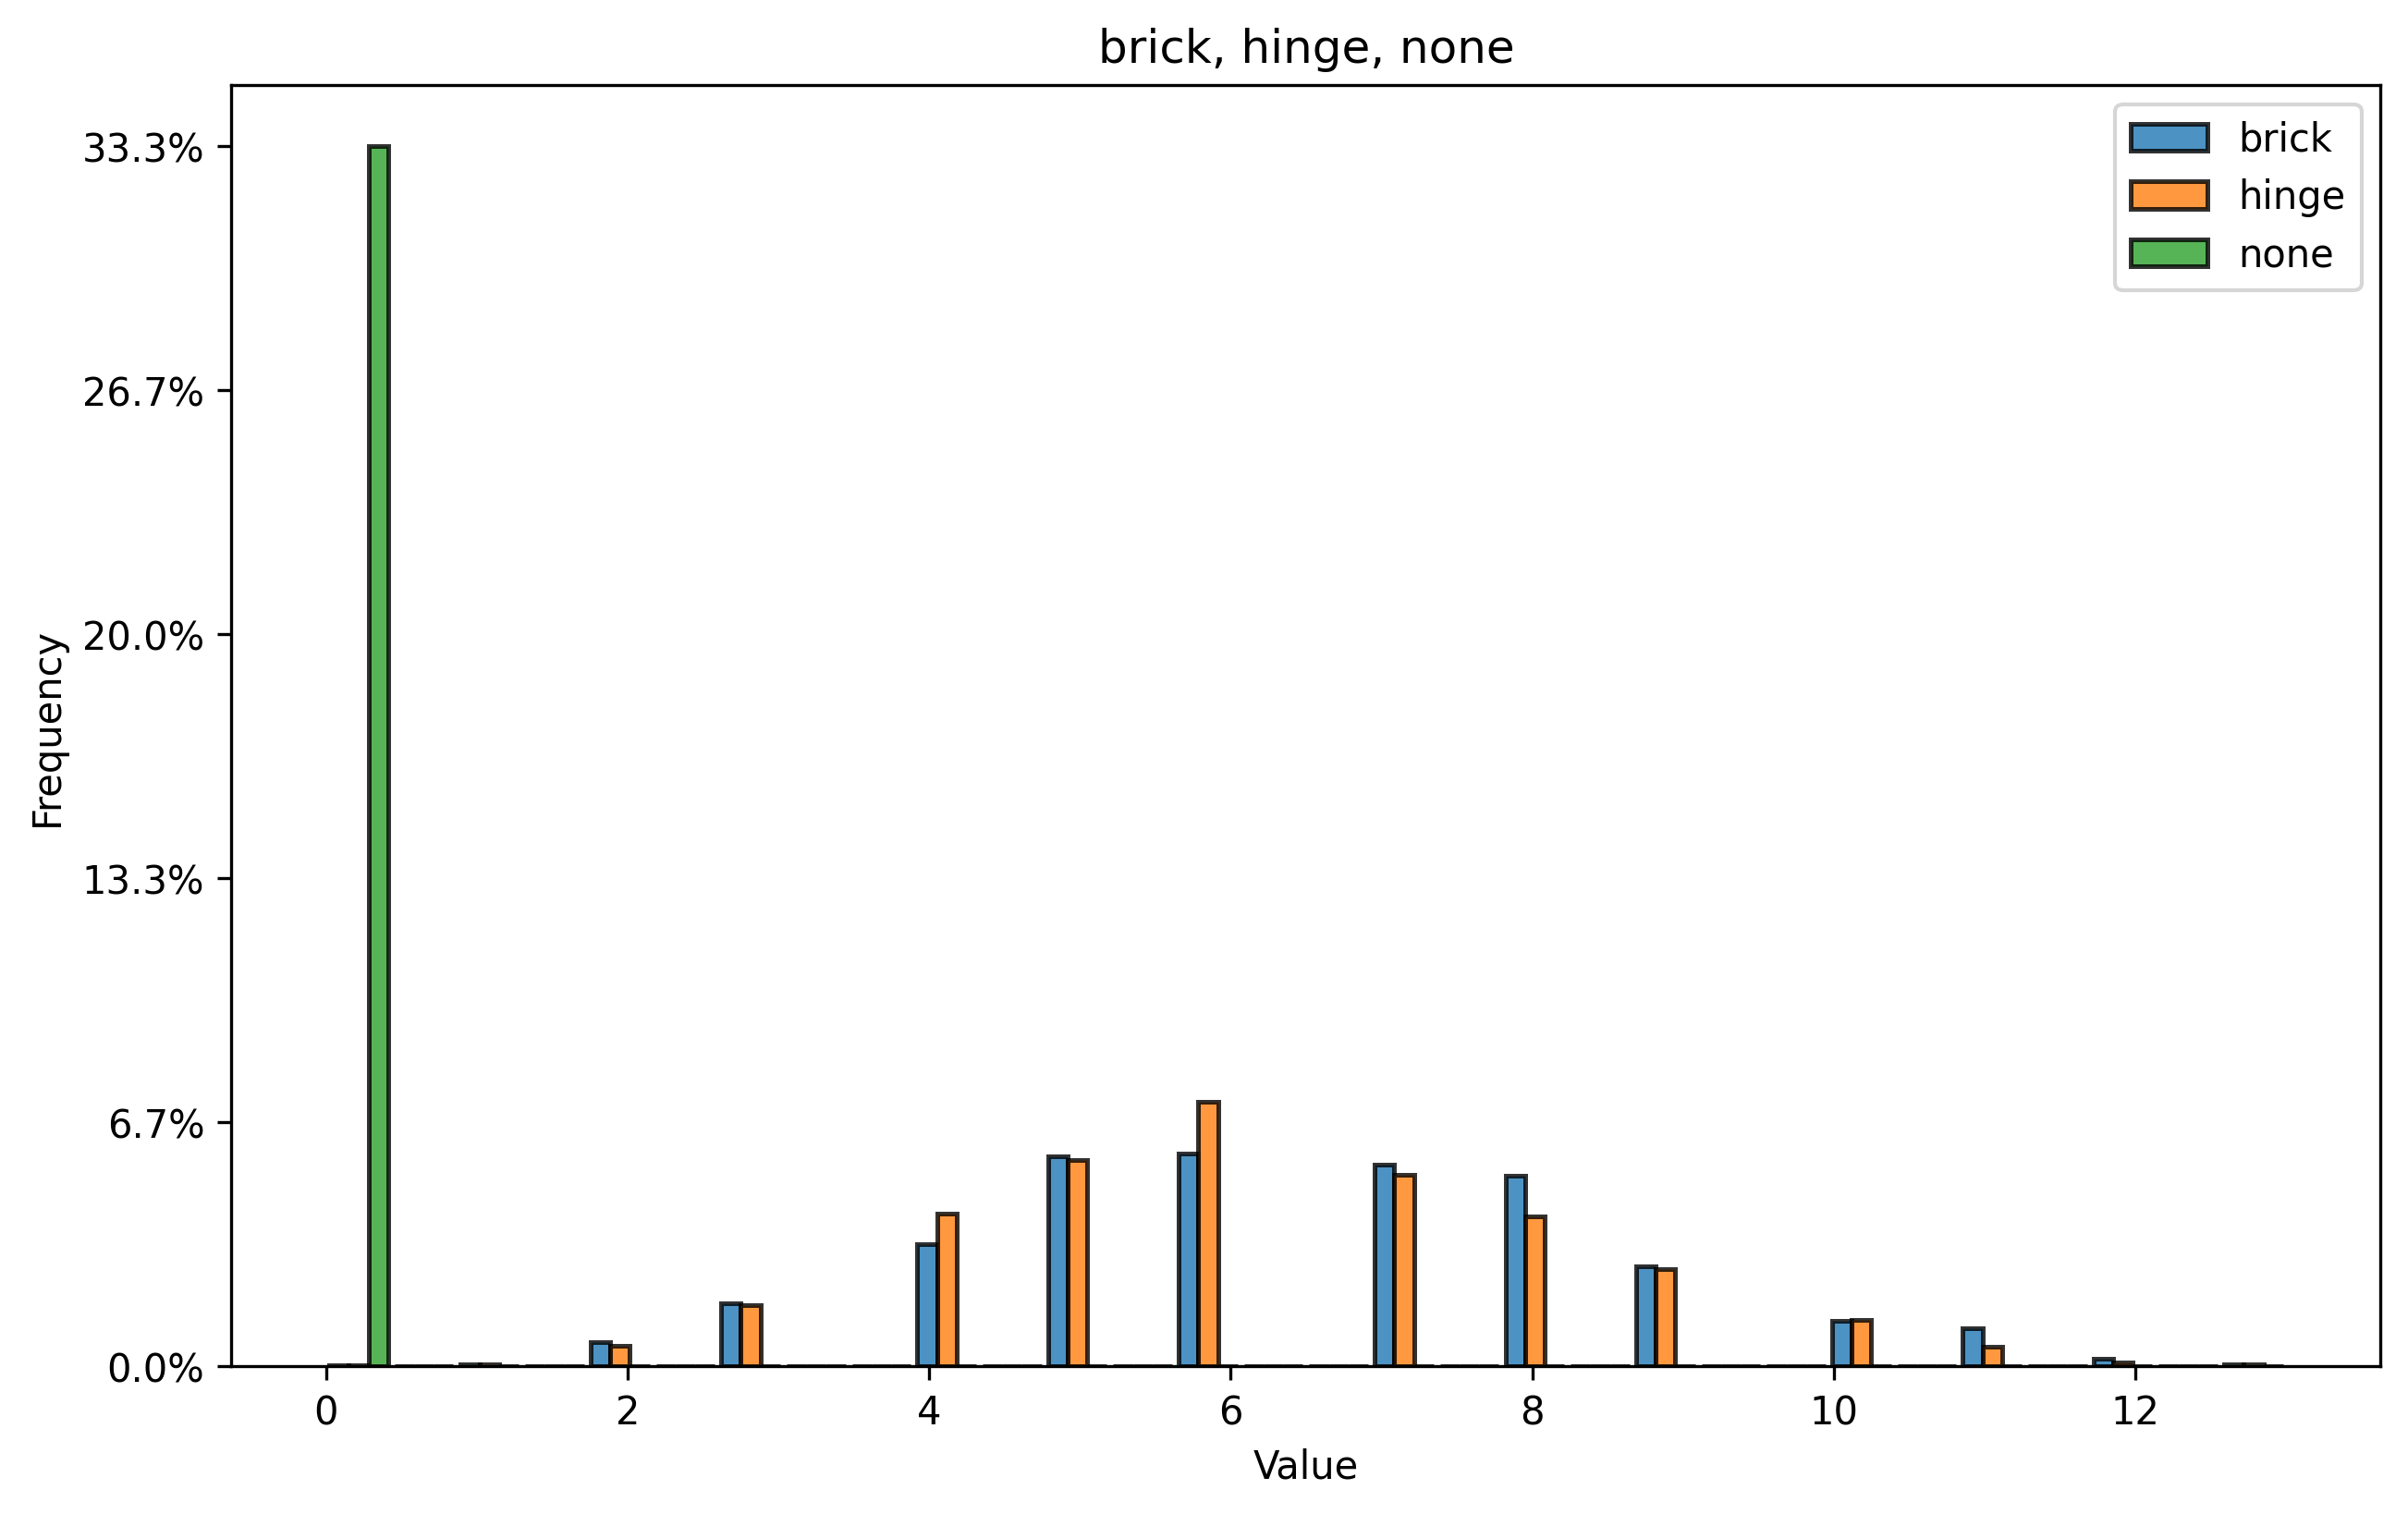

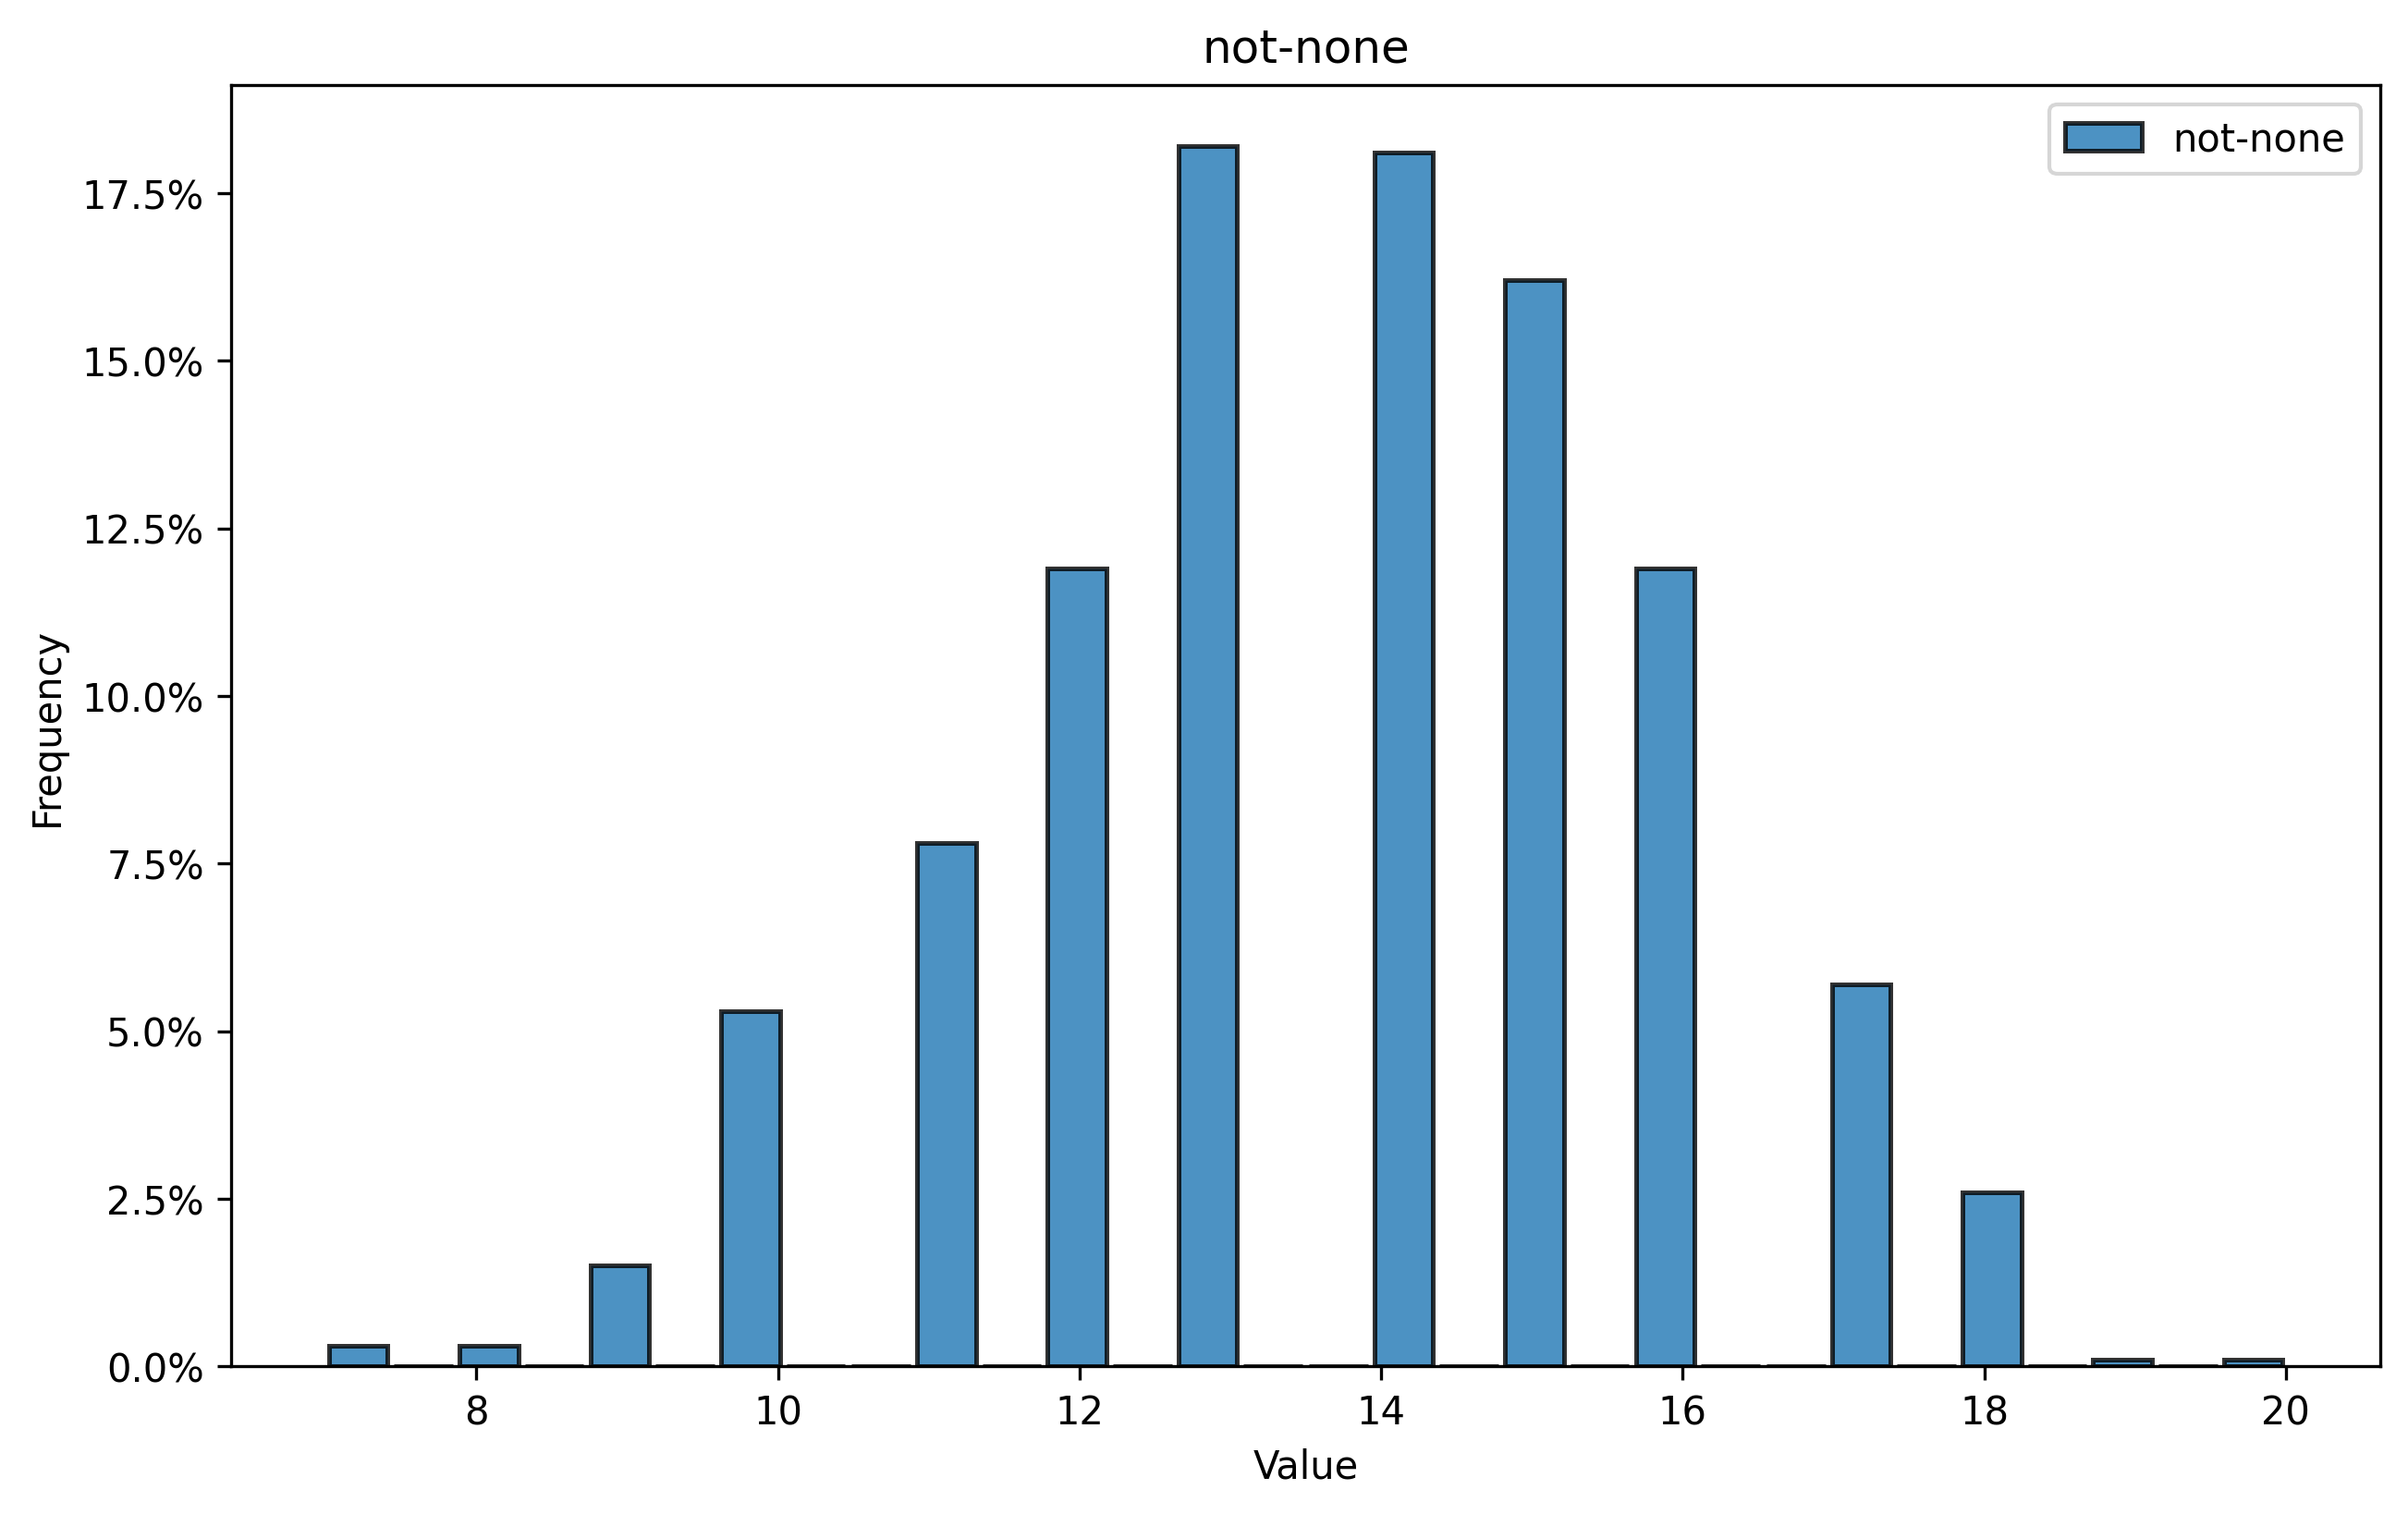

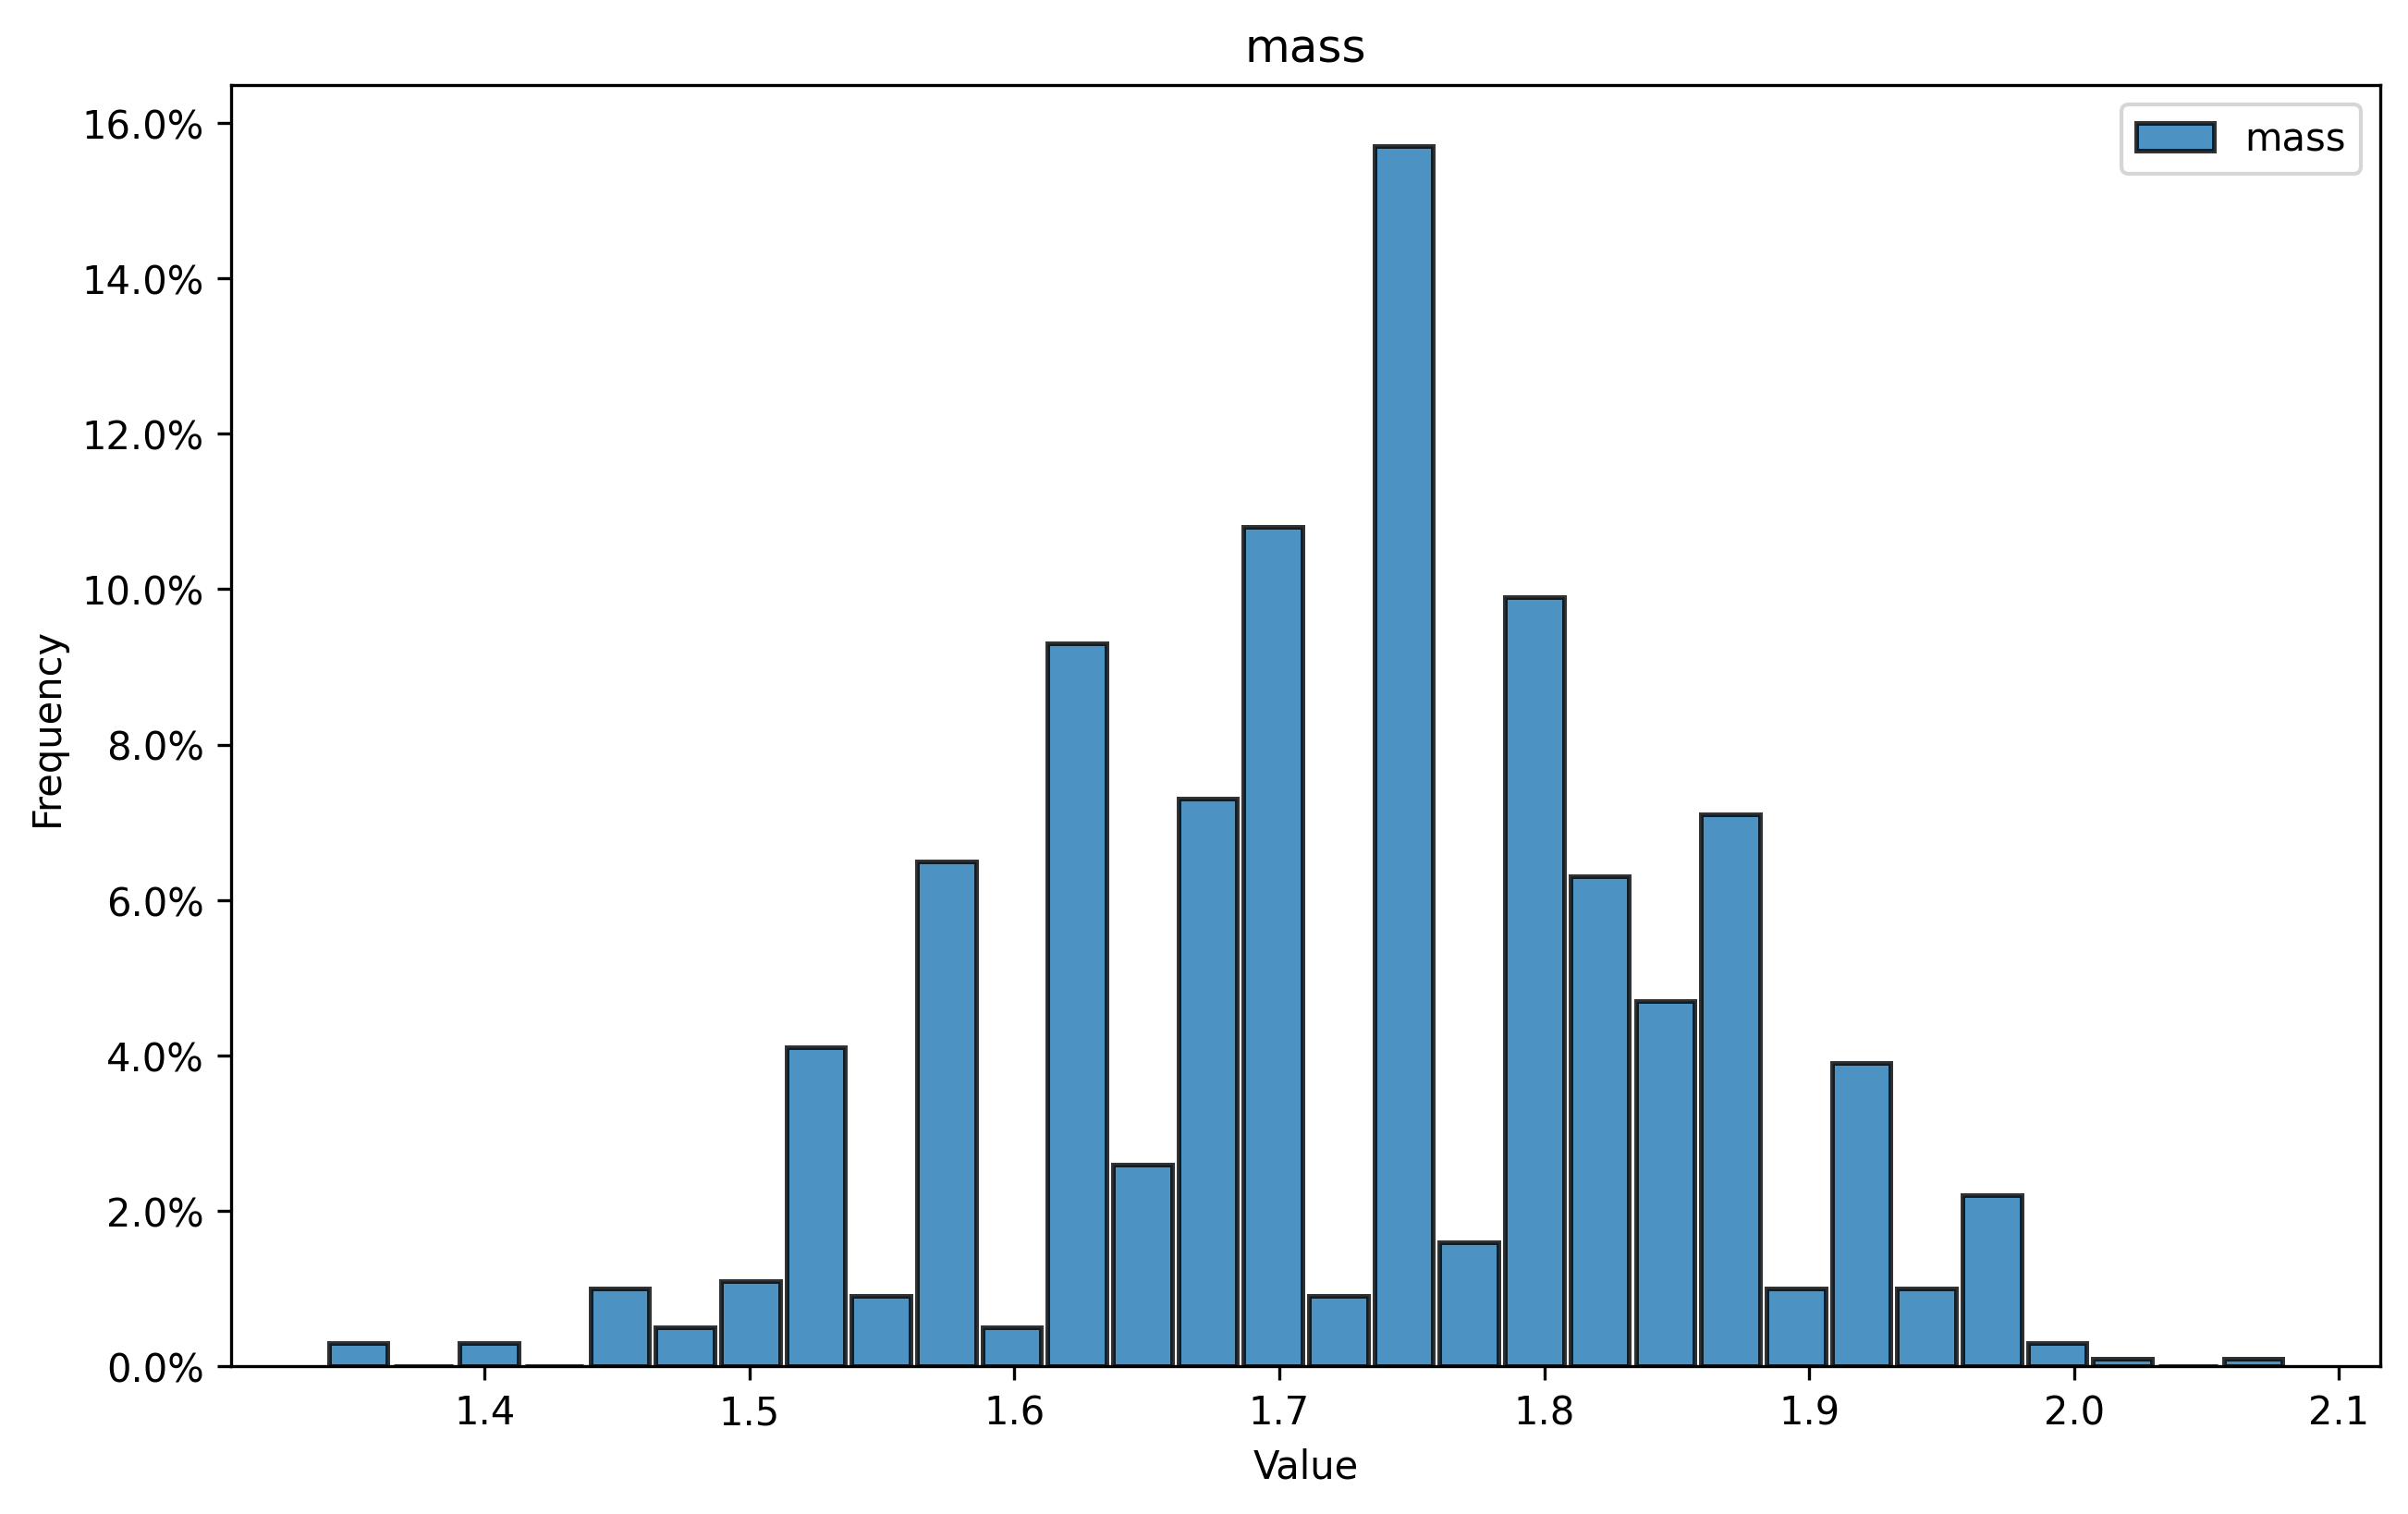

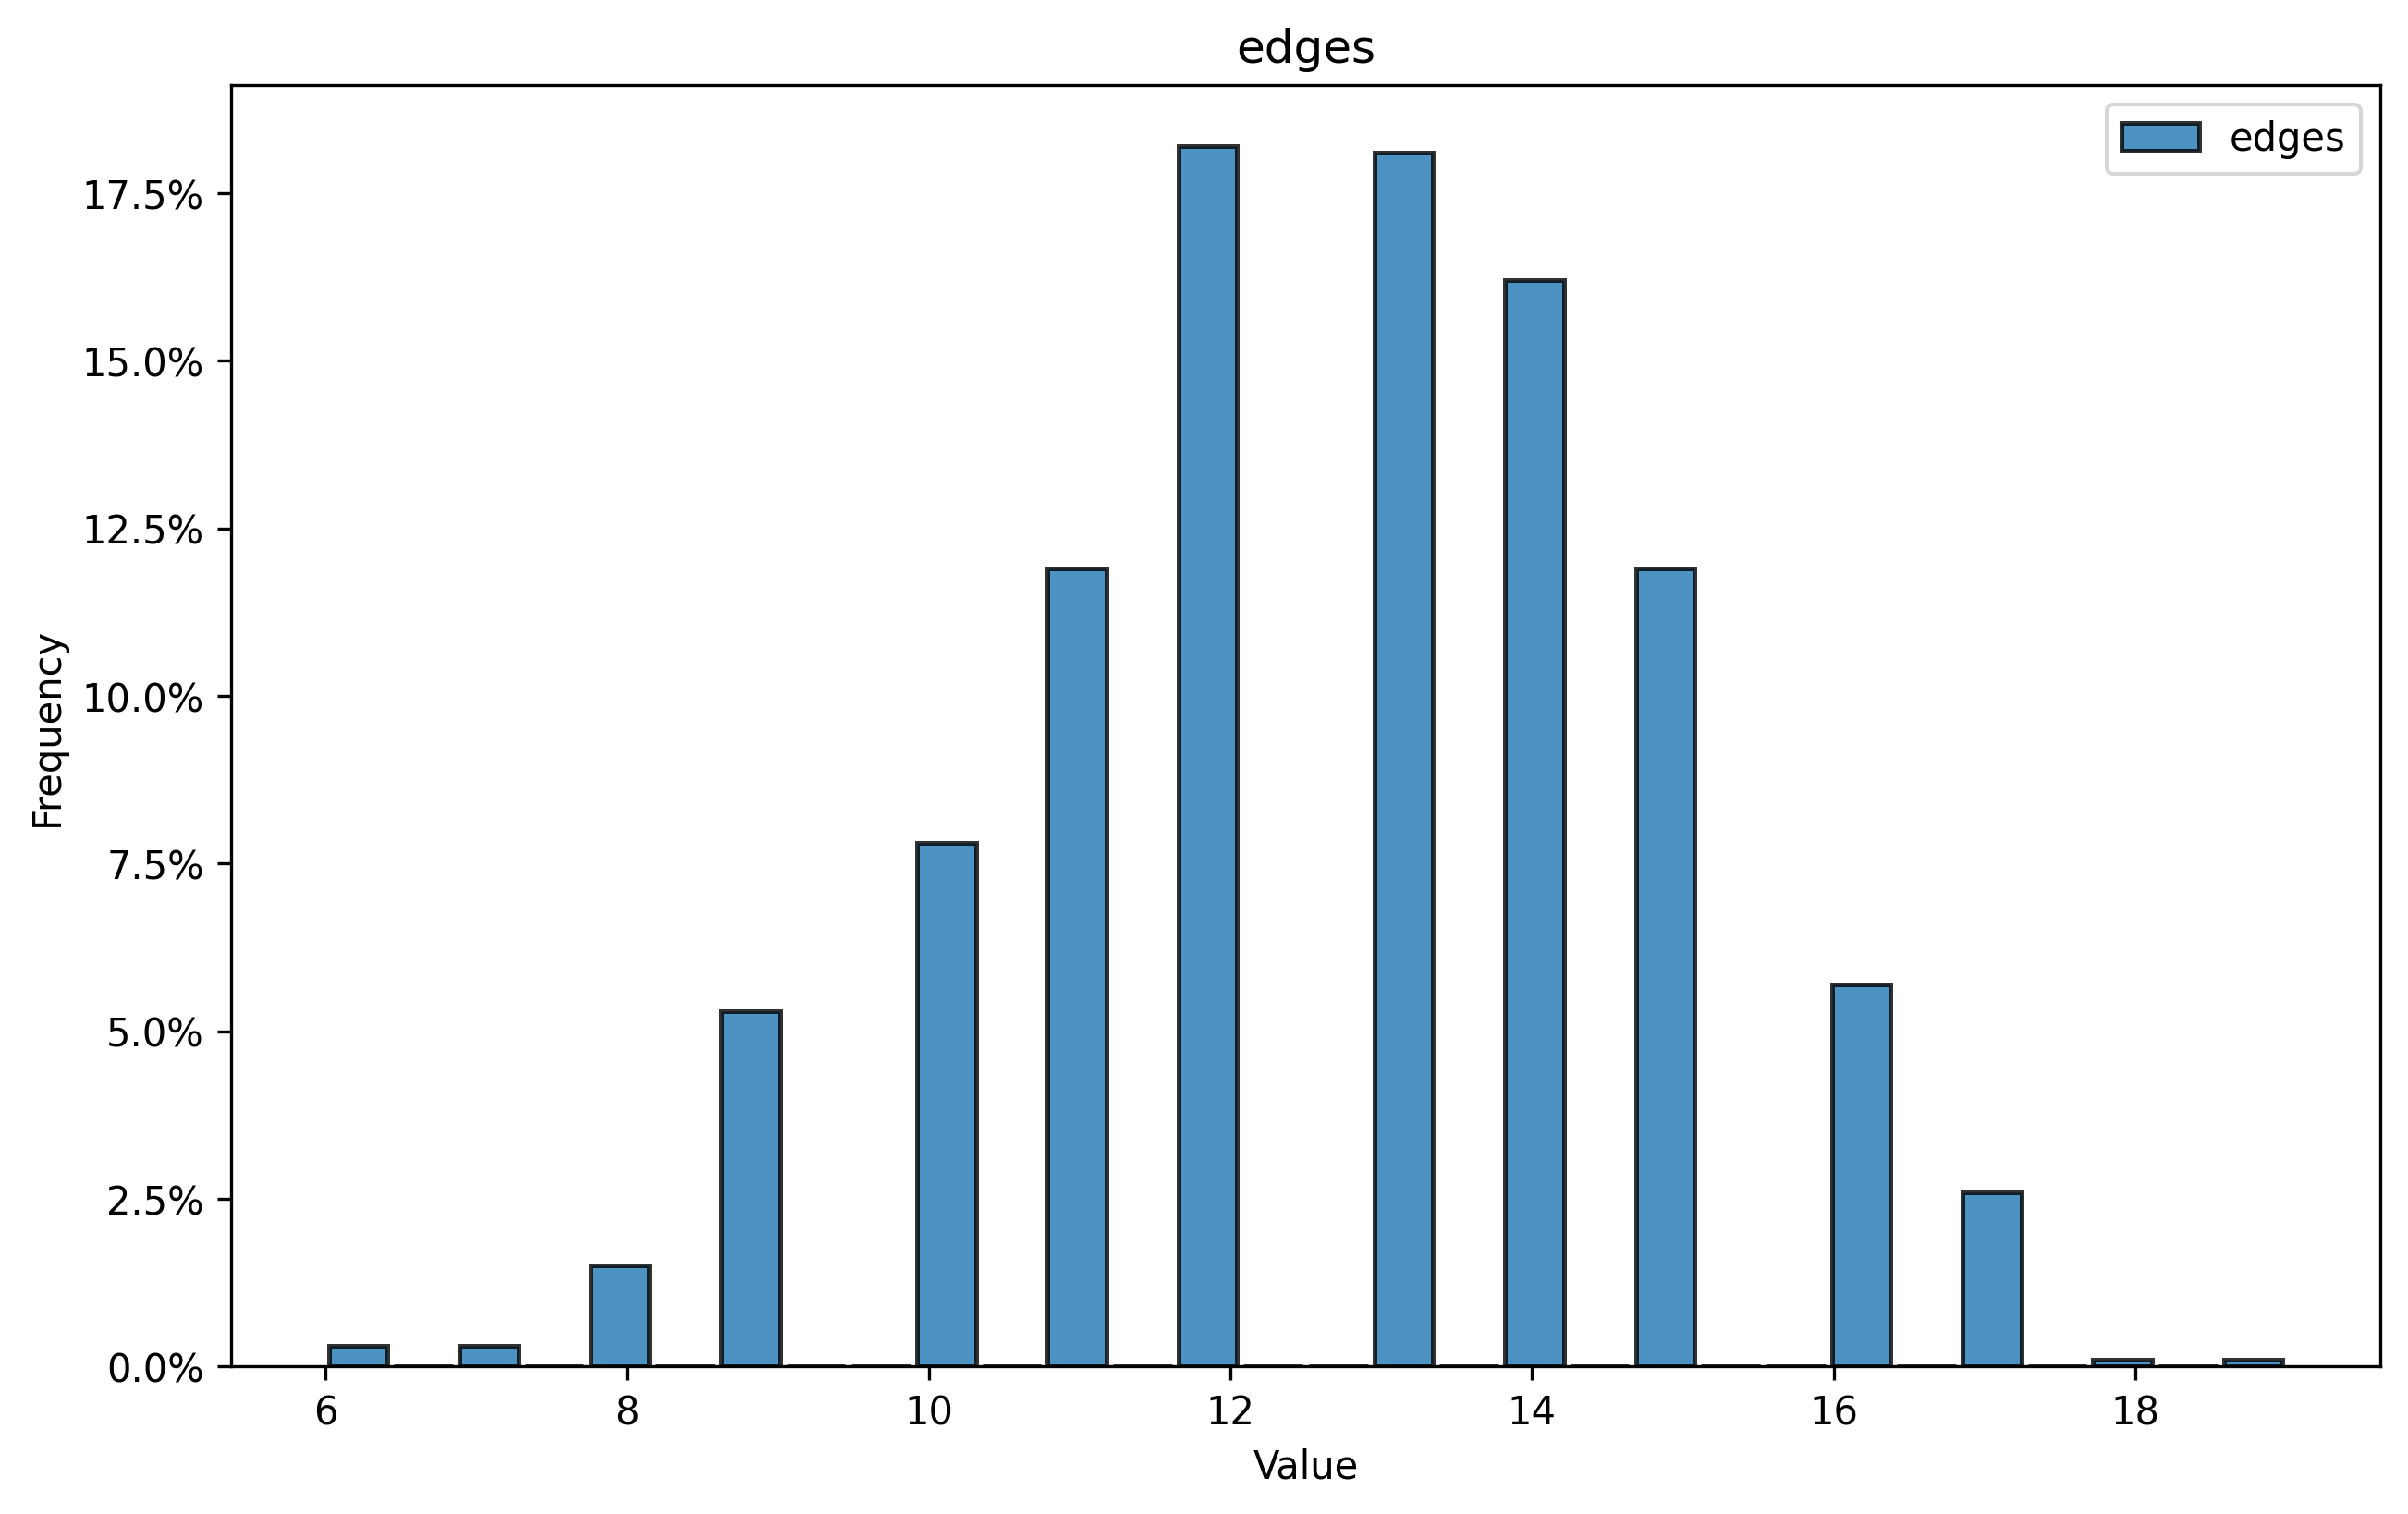

In [5]:
create_boxplot_from_raw(analyzed_population.raw)

create_histogram_from_raw(
    analyzed_population.raw, keys=["brick", "hinge", "none"]
)
create_histogram_from_raw(analyzed_population.raw, keys=["not-none"])
create_histogram_from_raw(analyzed_population.raw, keys=["mass"])
create_histogram_from_raw(analyzed_population.raw, keys=["edges"])

Use df to get insight into the same derived property across properties

In [6]:
analyzed_population.df_from_derived("numeric_stats")

,count,uniques,mean,std,median,Q1,Q3,num_outliers
property,,,,,,,,
core,1000,1,1.00,0.00,1.00,1.00,1.00,0
brick,1000,14,6.45,2.11,6.00,5.00,8.00,3
hinge,1000,14,6.25,2.00,6.00,5.00,8.00,3
none,1000,1,0.00,0.00,0.00,0.00,0.00,0
edges,1000,14,12.71,2.09,13.00,11.00,14.00,4
not-none,1000,14,13.71,2.09,14.00,12.00,15.00,4
mass,1000,95,1.73,0.12,1.74,1.64,1.81,4


In [7]:
analyzed_population.df_from_derived(
    "uniques",
    keys=["edges", "not-none"],
    sort_columns=True,
    save_file="counts.csv",
)

[18:15:54] saving file to /Users/salomepoulain/projects/ariel-zoo/zoo/__data__/counts.csv         ]8;id=829182;file:///Users/salomepoulain/projects/ariel-zoo/src/ariel_experiments/characterize/population.py\population.py]8;;\:]8;id=159054;file:///Users/salomepoulain/projects/ariel-zoo/src/ariel_experiments/characterize/population.py#910\910]8;;\

,6.count,7.count,8.count,9.count,10.count,11.count,12.count,13.count,14.count,15.count,16.count,17.count,18.count,19.count,20.count
property,,,,,,,,,,,,,,,
edges,3.0,3,15,53,78,119,182,181,162,119,57,26,1,1,NaN
not-none,NaN,3,3,15,53,78,119,182,181,162,119,57,26,1,1.0


Use simple navigator to scan easily through values

In [8]:
simple_navigator = SimpleNavigator(analyzed_population.to_dict())

Use IndidvidualVisualizer to visualize the graphs

In [9]:
individual_visualizer = IndividualVisualizer(index_dict=analyzed_population.derived, population=population)